In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
!pip install rasterio
!pip install sap

In [5]:
from pathlib import Path # Manage folders and files
import rasterio as rio # Reads and writes geospatial raster data
from matplotlib import pyplot as plt # Display plots and images
import matplotlib as mpl
import numpy as np # Multi-dimensional arrays
import sap # To create morphological trees

# Pattern Spectra (PS)

![](img/ps.svg)

## 0. Setup: Load the DSM tile and compute the max-tree

- Load the dsm tile `tile_path`.
- Compute the max-tree.

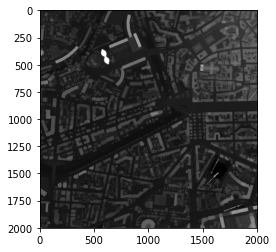

In [6]:
tile_path = Path('./image processing/dsm_vox_50cm_tile_-12_0.tif')

image=(rio.open(tile_path)).read(1)
plt.imshow(image, cmap='gray')
plt.show()



# max_tree = None # You can do it!
# creation of the max-tree of an image
mt = sap.MaxTree(image)

## 1. Compute attributes and visualize the distrbution of values

- Compute the `area` and `compactness` attributes
- How can we visualize the distribution of values? Display the distribution of areas, then compactness.
    + Tip: you can some matplotlib functions to plot the visualizations!

In [7]:
#computing the area attributes of the nodes
area = mt.get_attribute('area')
print("area attribute in vector: ",area)

#computing the compactness attributes of the nodes
compactness = mt.get_attribute('compactness')
print("compactness attribute in vector: ",compactness)

area attribute in vector:  [1.000000e+00 1.000000e+00 1.000000e+00 ... 4.003860e+06 4.003861e+06
 4.004001e+06]
compactness attribute in vector:  [1.         1.         1.         ... 0.89296008 0.89338216 1.        ]


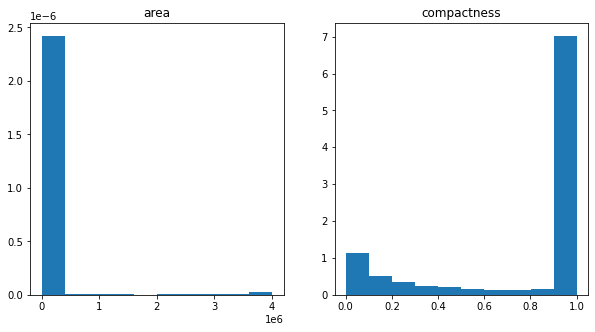

In [9]:
#visualize plots

plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.hist(area,density=True)
plt.title("area")
plt.subplot(122)
plt.hist(compactness,density=True)
plt.title("compactness")
plt.show()

# 2. Compute a Pattern Spectrum

The pattern spectrum can be seen as nodes attributes probability distribution: for a given attribute value we display the probability to have nodes with these properties in the image.

To compute the Pattern Spectrum, you need to weight the histograms with the area of the flat zone times the height diffence of the flat zone and its direct ancester.

- Compute and display the Pattern Spectrum
    - For `area` attributes
    - For `compactness` attributes

Text(0.5, 1.0, 'Linear colormap')

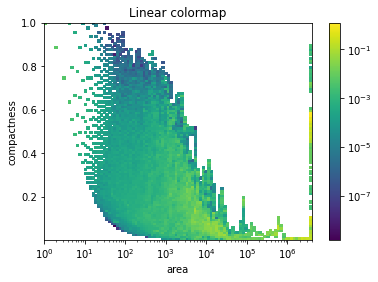

In [10]:
#computing pattern spectra
ps = sap.spectrum2d(mt, 'area', 'compactness', x_log=True,weighted=True)
sap.show_spectrum(*ps)
plt.colorbar()
plt.xlabel('area')
plt.ylabel('compactness')
plt.title('Linear colormap')

## 3. Compute and display a 2D Pattern Spectrum with SAP

- Compute a 2D PS with SAP
- Find object of interest in the spectrum
- Filter the DSM according to the object of interest in the spectum

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """Entry point for launching an IPython kernel.


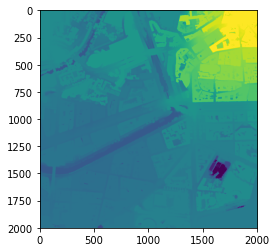

In [11]:
interest=np.array(ps)[1]
plt.imshow(mt.reconstruct(area<100000))
plt.show()

Here, based on the pattern spectrum a range was selected as an area of interest and accordingly, reconstructed to for that region.